In [1]:
# some default settings for plots 
# to display plots in notebook
%matplotlib inline
%config InlineBackend.figure_format = "retina"
#rcParams["savefig.dpi"] = 300  # high res plots
#rcParams["font.size"] = 8

import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt # plots
import cartopy.crs as ccrs      # map projections
import pandas as pd             # large arrays
import numpy as np              # large arrays and matrices
import xarray as xr             # major tool to work with NetCDF data!

In [3]:
from util.functions import area_latlon
from util.gamap_colormap import WhGrYlRd

# Create xarray region mask

In [4]:
# Import regionmask and check the version
import regionmask
regionmask.__version__

'0.5.0'

In [6]:
# load data
fname = '/exports/csce/datastore/geos/users/msadiq/EDGARv5/v50_CO2_excl_short-cycle_org_C_2018.0.1x0.1.nc'
#fname = '/home/msadiq/Desktop/co2/data/emission/ODIAC/odiac2019_1x1d_2015.nc'
ds = xr.open_dataset(fname)
ds

<xarray.Dataset>
Dimensions:  (lat: 1800, lon: 3600)
Coordinates:
  * lat      (lat) float32 -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
  * lon      (lon) float32 0.05 0.15 0.25 0.35 ... 359.65 359.75 359.85 359.95
Data variables:
    emi_co2  (lat, lon) float32 ...
Attributes:
    Conventions:       CF-1.0
    title:             Annual Mean Emissions of CO2 - 
    institution:       European Commission, Joint Research Centre
    source:            http://edgar.jrc.ec.europa.eu/
    history:           Created from original data (0.1x0.1 degrees) using IDL...
    references:        European Commission, Joint Research Centre (JRC)/Nethe...
    copyright_notice:  Reproduction of the data is authorized, except for com...
    contact:           JRC-EDGAR@ec.europa.eu

In [7]:
# read in one month of data, [180,360]
#dr = ds['intl_bunker'][1,:,:]
dr = ds['emi_co2']

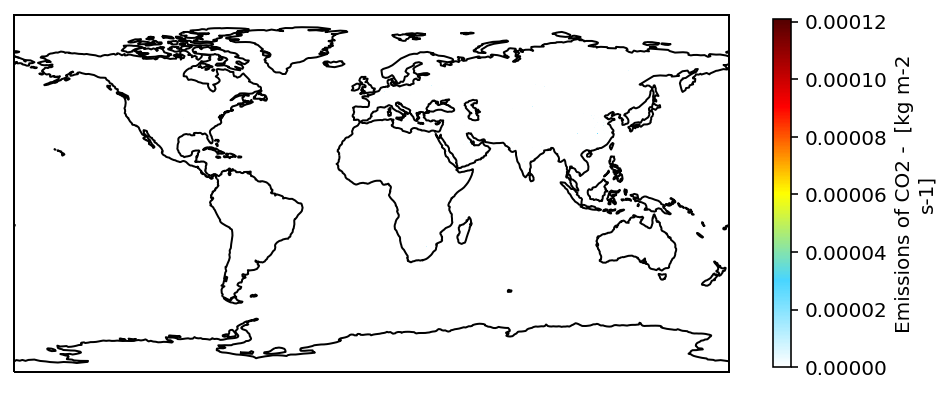

In [9]:
# global map
fig = plt.figure(figsize=[8, 4])
proj=ccrs.PlateCarree()

ax = plt.subplot(111, projection=proj)

dr.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=WhGrYlRd, cbar_kwargs={'shrink': 0.8})

ax.coastlines();

### Making a mask

In [13]:
#mask = regionmask.defined_regions.giorgi.mask(dr)
mask_countries = regionmask.defined_regions.natural_earth.countries_110.mask(dr)

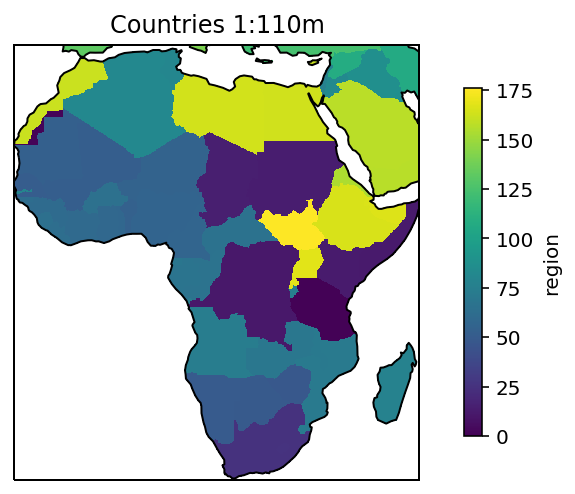

In [24]:
# plot the mask
fig = plt.figure(figsize=[8, 4])

proj=ccrs.PlateCarree()
ax = plt.subplot(111, projection=proj)

mask_countries.plot(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink': 0.8,})
ax.set_title("Countries 1:110m")
ax.coastlines()
ax.set_extent([-17, 51, -35, 38], crs=ccrs.PlateCarree());

fig.savefig('/geos/u73/msadiq/GEOS-Chem/analysis/emission/plots/masks_Africa.png', dpi=300)

In [ ]:
# copy attributes from an existing GEOS-Chem mask file
fname = '/home/msadiq/Desktop/co2/data/emission/GC/SE_Asia_mask.generic.1x1.nc'
ds = xr.open_dataset(fname)
#ds
#np.datetime64('2000-01-01')

In [ ]:
# create one NetCDF file for one MASK, and save
nm_masks = mask.max().values # number of masks
for count in np.arange(nm_masks)+1:
    target = xr.Dataset({"MASK": (("time", "lat", "lon"), np.zeros(180*360).reshape(1,180,360))},coords=ds.coords)
    target = target.astype(dtype='float32')
    mask_TF = mask == count
    target['MASK'][0,:,:] = mask_TF.where(True)
    target['MASK'].attrs = ds['MASK'].attrs
    target['lon'].attrs = ds['lon'].attrs
    target['lat'].attrs = ds['lat'].attrs
    #print(target)
    target.attrs = ds.attrs
    target.attrs['comment'] = 'giorgi region masks, by m.sadiq 2020'
    target.to_netcdf('/home/msadiq/Desktop/co2/data/emission/GC/MASK' + str(count.astype(int)) + '_giorgi_1x1.nc')

In [ ]:
# plot the last mask
fig = plt.figure(figsize=[8, 4])

proj=ccrs.PlateCarree()
ax = plt.subplot(111, projection=proj)

target['MASK'].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='tab20', cbar_kwargs={'shrink': 0.8, 'label': ''})
ax.set_title("MASK 21")
ax.coastlines();

In [ ]:
# one more mask, for the rest of the globe
target = xr.Dataset({"MASK": (("time", "lat", "lon"), np.zeros(180*360).reshape(1,180,360))},coords=ds.coords)
target = target.astype(dtype='float32')
mask_nan = np.isnan(mask)
target['MASK'][0,:,:] = mask_nan.where(True)
target['MASK'].attrs = ds['MASK'].attrs
target['lon'].attrs = ds['lon'].attrs
target['lat'].attrs = ds['lat'].attrs
#print(target)
target.attrs = ds.attrs
target.attrs['comment'] = 'giorgi region masks, by m.sadiq 2020'
target.to_netcdf('/home/msadiq/Desktop/co2/data/emission/GC/MASK22_giorgi_1x1.nc')

In [ ]:
# plot the last mask
fig = plt.figure(figsize=[8, 4])

proj=ccrs.PlateCarree()
ax = plt.subplot(111, projection=proj)

target['MASK'].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='tab20', cbar_kwargs={'shrink': 0.8, 'label': ''})
ax.set_title("MASK 22")
ax.coastlines();